In [1]:
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\icoul\miniconda3\envs\meteor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\icoul\miniconda3\envs\meteor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\icoul\miniconda3\envs\meteor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel('./data/creepypastas.xlsx')
df.head()

,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12 minutes,"February 20, 2020","Drugs and Addictions, Madness, Paranoia, and ..."
1,A Shattered Life,9.13,"disease, entities, Matt Dymerski, monsters, p...","I don’t know when you’re going to read this,...",14 minutes,"July 22, 2020","Madness, Paranoia, and Mental Illness, Monste..."
2,My Father Punished Me When I Talked to Ghosts,9.12,"abductions, blindness, child abuse, childhood...","I’ve been blind since birth. As I grew up, eve...",8 minutes,"December 10, 2019","Abductions and Kidnappings, Children and Chil..."
3,Distorted Warning Signals,9.12,Ashley Rose Wellman\n,"When I got the first one, I was literally seco...",3 minutes,"July 13, 2019","Beings and Entities, Deaths, Murders, and Dis..."
4,He Who Wanders,9.12,Simon Simonian\n,I missed the scorching wind of Andalusia. How ...,22 minutes,"January 24, 2017",Beings and Entities


In [3]:
# clean and prepare the data

# drop invalid creepypasta row (advertisement)
df = df.drop(index=2511)

In [4]:
# turn estimated_reading_time into a number
print(df['estimated_reading_time'].unique())


['12 minutes' '14 minutes' '8 minutes' '3 minutes' '22 minutes'
 '10 minutes' '13 minutes' '21 minutes' '19 minutes' '28 minutes'
 '5 minutes' '23 minutes' '26 minutes' '57 minutes' '27 minutes'
 '17 minutes' '47 minutes' '7 minutes' '29 minutes' '42 minutes'
 '16 minutes' '20 minutes' '58 minutes' '6 minutes' '11 minutes'
 '25 minutes' '33 minutes' '15 minutes' '< 1 minute' '2 minutes'
 '4 minutes' '74 minutes' '86 minutes' '41 minutes' '9 minutes'
 '18 minutes' '32 minutes' '48 minutes' '54 minutes' '15 minut'
 '24 minutes' '139 minutes' '75 minutes' '36 minutes' '112 minutes'
 '35 minutes' '69 minutes' '68 minutes' '38 minutes' '31 minutes'
 '34 minutes' '76 minutes' '19 minut' '57 minut' '52 minutes' '84 minutes'
 '30 minutes' '39 minutes' '49 minutes' '46 minutes' '64 minutes'
 '201 minutes' '40 minutes' '53 minutes' '44 minutes' '73 minutes'
 '105 minutes' '67 minutes' '155 minutes' '99 minutes' '20 minut'
 '56 minutes' '96 minutes' '50 minutes' '43 minutes' '70 minutes'
 '11 min

In [5]:
# estimated_reading_time is either "X minutes", "X minut", "< 1 minute" or nan
df['estimated_reading_time'] = df['estimated_reading_time'].str.replace(' minutes', '')
df['estimated_reading_time'] = df['estimated_reading_time'].str.replace('< 1 minute', '1')
df['estimated_reading_time'] = df['estimated_reading_time'].str.replace(' minut', '')
# convert to numeric
df['estimated_reading_time'] = pd.to_numeric(df['estimated_reading_time'])
df.head(n=1)


,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12,"February 20, 2020","Drugs and Addictions, Madness, Paranoia, and ..."


In [6]:
# turn date into a datetime
df['publish_date'] = pd.to_datetime(df['publish_date'])
df.head(n=1)

,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12,2020-02-20,"Drugs and Addictions, Madness, Paranoia, and ..."


count    3509.000000
mean        7.565170
std         1.132894
min         0.860000
25%         6.980000
50%         7.790000
75%         8.420000
max         9.250000
Name: average_rating, dtype: float64

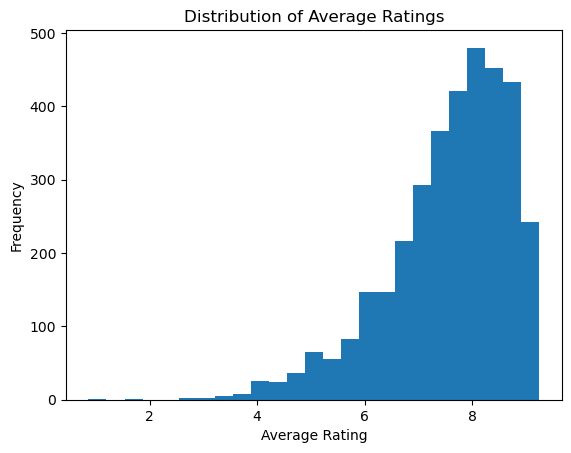

In [7]:
# plot ratings to see distribution
plot = df['average_rating'].plot.hist(bins=25)
plot.set_xlabel('Average Rating')
plot.title.set_text('Distribution of Average Ratings')
# ratings are skewed left, most ratings are between 6.5 and 8.5
df['average_rating'].describe()

count    3509.000000
mean        9.650328
std        11.415197
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max       201.000000
Name: estimated_reading_time, dtype: float64


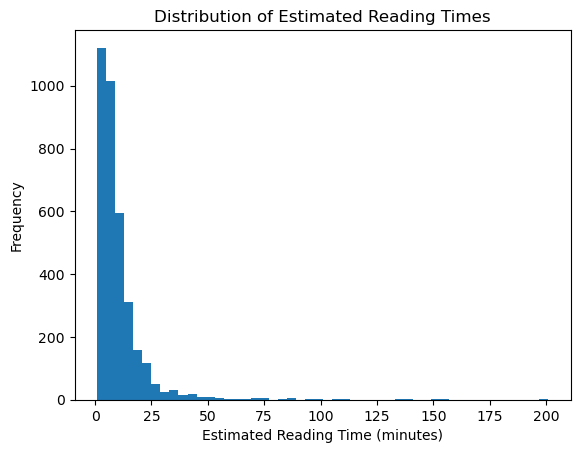

In [8]:
# plot reading times to see distribution
plot = df['estimated_reading_time'].plot.hist(bins=50)
plot.set_xlabel('Estimated Reading Time (minutes)')
plot.title.set_text('Distribution of Estimated Reading Times')
# most stories are relatively short
print(df['estimated_reading_time'].describe())

Text(0, 0.5, 'Number of Creepypastas')

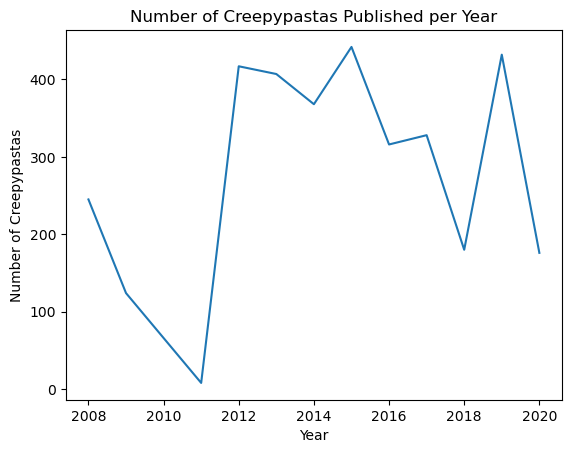

In [9]:
# let's see the popularity of creepypastas over time
# let's plot month by month how many creepypastas were published
stories_per_year = df['publish_date'].dt.year.value_counts()
plot = plt.plot(stories_per_year.sort_index())
plt.title('Number of Creepypastas Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Creepypastas')
# huge spike in 2012 that seems to stay for a couple of years, then a resurgence in 2019

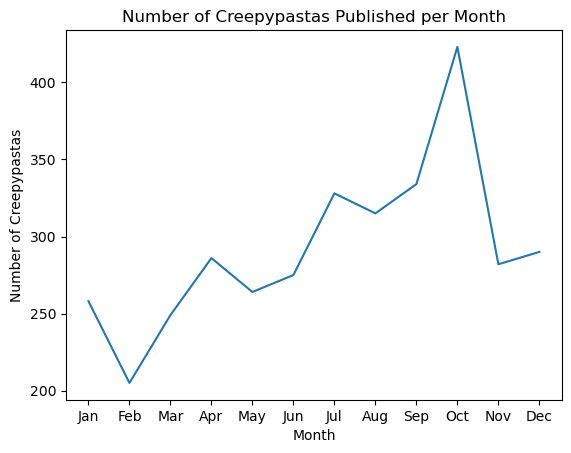

In [10]:
# is there a correlation between number of stories published and the time of year?
# let's plot month by month how many creepypastas were published
stories_per_month = df['publish_date'].dt.month.value_counts()
plot = plt.plot(stories_per_month.sort_index())
plt.title('Number of Creepypastas Published per Month')
plt.xlabel('Month')
plt.ylabel('Number of Creepypastas')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
ticks = plt.xticks(stories_per_month.sort_index().index, months)
# pretty large spike in October, potentially due to Halloween

Text(0, 0.5, 'Estimated Reading Time (minutes)')

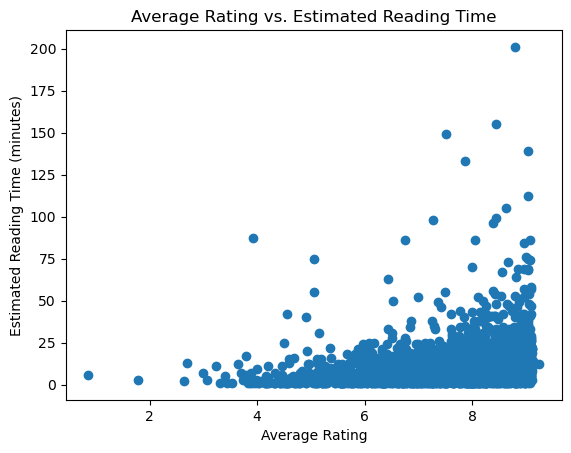

In [11]:
# interesting basic insights so far.
# let's dig deeper into the data
# do shorter stories get higher ratings?
plot = plt.plot(df['average_rating'], df['estimated_reading_time'], 'o')
plt.title('Average Rating vs. Estimated Reading Time')
plt.xlabel('Average Rating')
plt.ylabel('Estimated Reading Time (minutes)')

In [12]:
# let's dig into the tags and categories
# what are the most popular tags?

tags = []
tag_dict = {}
for tag in df['tags']:
    if type(tag) == str:
        # check for multiple tags
        tags_in_entry = tag.split(', ')
        if(len(tags_in_entry) > 1):
            for tag in tags_in_entry:
                # clean tag and add to list and dict
                tag = tag.replace('\n','')
                tag = tag.strip()
                tags.append(tag)
                # increment tag count in dict
                tag_dict[tag] = tag_dict.get(tag, 0) + 1
        else:
            tag = tag.replace('\n','')
            tags.append(tag)
            tag_dict[tag] = tag_dict.get(tag, 0) + 1
# remove duplicates
tags = list(set(tags))
# sort dictionary by value
tag_dict = dict(sorted(tag_dict.items(), key=lambda item: item[1], reverse=True))
print("The 5 most popular creepypasta tags are:")
for i in range(5):
    print(list(tag_dict.keys())[i], ":", list(tag_dict.values())[i])

The 5 most popular creepypasta tags are:
deaths : 246
strange : 186
entities : 178
Video Narratives OK : 171
beings : 162


In [114]:
# let's do the same for categories
categories = []
category_dict = {}
for category in df['categories']:
    if type(category) == str:
        categories_in_entry = category.split(', ')
        if(len(categories_in_entry) > 1):
            for category in categories_in_entry:
                category = category.replace('\n','')
                # some entries have "Please wait..." as a category on accident, let's remove those
                category = category.replace('Please wait...', '')
                category = category.strip()
                
                
                categories.append(category)
                category_dict[category] = category_dict.get(category, 0) + 1
        else:
            # some entries have "Please wait..." as a category on accident, let's remove those
            category = category.replace('Please wait...', '')
            category = category.replace('\n','')
            category = category.strip()
            categories.append(category)
            category_dict[category] = category_dict.get(category, 0) + 1
# remove duplicates
categories = list(set(categories))
# sort dictionary by value
category_dict = dict(sorted(category_dict.items(), key=lambda item: item[1], reverse=True))
print("The 10 most popular creepypasta categories are:")
for i in range(10):
    print(list(category_dict.keys())[i], ":", list(category_dict.values())[i])



The 10 most popular creepypasta categories are:
Beings and Entities : 1277
Strange and Unexplained : 1195
Deaths : 752
Murders : 752
and Disappearances : 752
Madness : 498
Paranoia : 498
and Mental Illness : 498
Locations and Sites : 435
Artifacts and Objects : 233


Text(0.5, 1.0, 'Average Rating by Category')

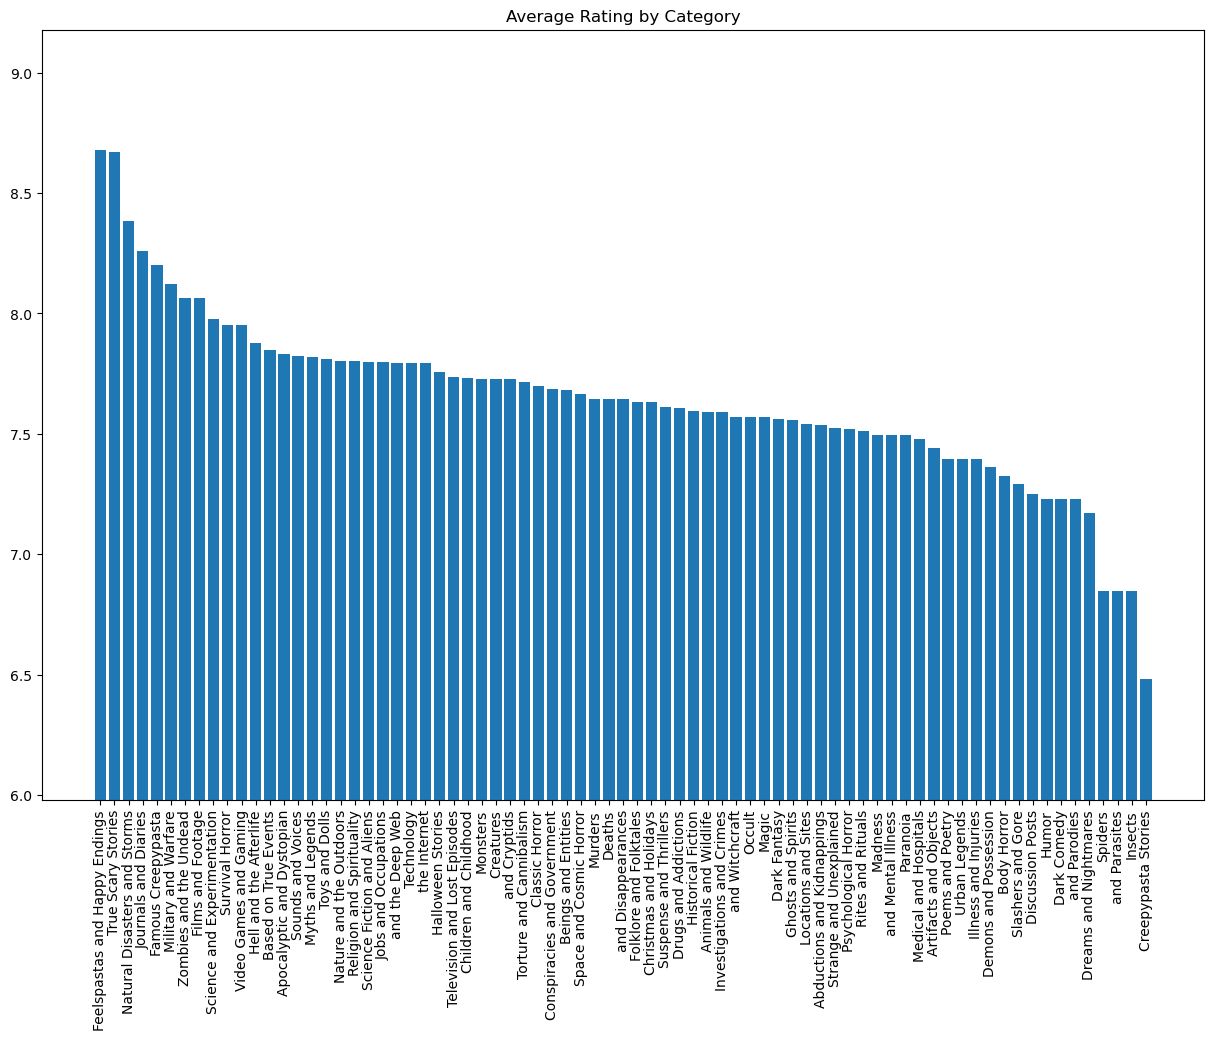

In [115]:
# hmm, lot's of beings and entities! Is there a correlation between the category and the average rating?
# let's plot the average rating for each category
category_average_ratings = {}
all_ratings = []
for category in categories:
    # print(category)
    # get avg rating from stories that have this category (stories may have multiple)
    rating = df[df['categories'].str.contains(category)]['average_rating'].mean()
    category_average_ratings[category] = rating
    all_ratings.append(rating)

# sort dict by avg rating
category_average_ratings = dict(sorted(category_average_ratings.items(), key=lambda item: item[1], reverse=True))

figure = plt.figure(figsize=(15, 10))

plot = plt.bar(category_average_ratings.keys(), category_average_ratings.values())

ticks = plt.xticks(rotation='vertical')

ax = plt.gca()
ymin = min(all_ratings) - 0.5
ymax = max(all_ratings) + 0.5
ax.set_ylim([ymin, ymax])

plt.title('Average Rating by Category')

In [15]:
# it appears that the highest rated creepypastas, on average, are those with happy endings!
# how many creepypastas have happy endings?
happy_endings = df[df['categories'].str.contains('Happy Endings')]['categories'].count()
print("Number of creepypastas with happy endings:", happy_endings)

Number of creepypastas with happy endings: 17


In [16]:
# pretty small sample size! Which makes sense, creepypastas are supposed to be scary and unsettling
# let's look at the next highest rated category, True Scary Stories
true_scary_stories = df[df['categories'].str.contains('True Scary Stories')]
true_scary_stories_count = true_scary_stories['categories'].count()
print("Number of creepypastas with true scary stories:", true_scary_stories_count)

Number of creepypastas with true scary stories: 1


In [17]:
# Only a single creepypasta with a true scary story! 
# This also makes sense, creepypastas are supposed to be fictional
# Let's look at this one true story.
true_story = true_scary_stories.iloc[0]
print("The true story: ", true_story['story_name'])

The true story:  The Dibbuk Box


In [18]:
# after doing some research, it turns out that this story is totally fake.
# https://en.wikipedia.org/wiki/Dybbuk_box

# let's look at the next highest rated category, Natural Disasters and Storms
natural_disasters = df[df['categories'].str.contains('Natural Disasters and Storms')]
natural_disasters_count = natural_disasters['categories'].count()
print("Number of creepypastas with natural disasters:", natural_disasters_count)

Number of creepypastas with natural disasters: 4


Text(0.5, 1.0, 'Number of Creepypastas per Category')

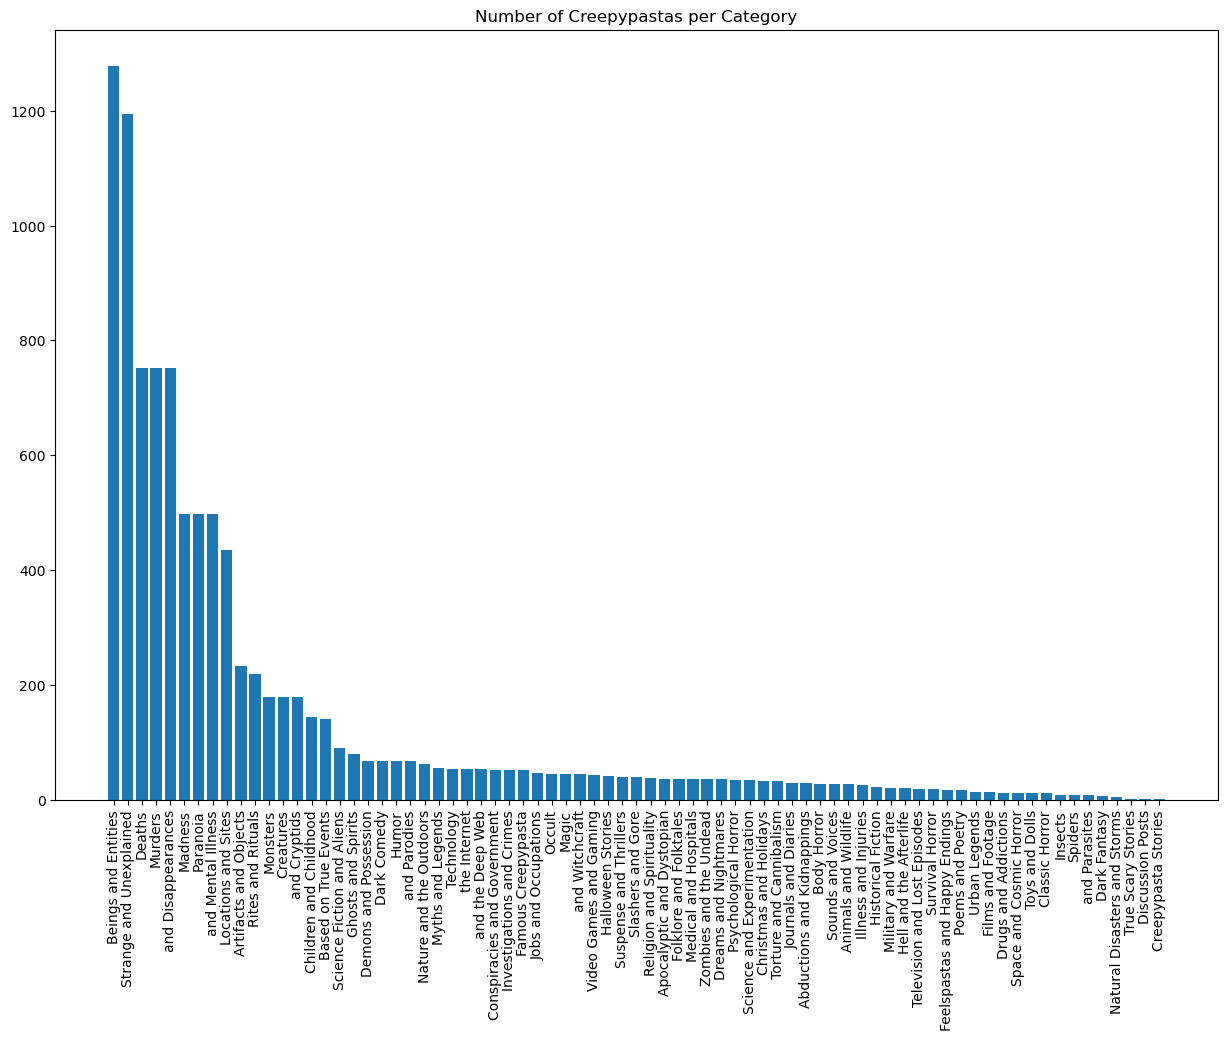

In [112]:
# Turns out the highest rated categories all have a super small sample size. Let's see how many stories of each category there are

figure = plt.figure(figsize=(15, 10))
plot = plt.bar(category_dict.keys(), category_dict.values())
ticks = plt.xticks(rotation='vertical')
plt.title('Number of Creepypastas per Category')

In [21]:
# let's do some analysis on the text itself
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# get all the words from the creepypastas
all_text_content = '\n'.join(df['body'])
print("Total characters in all creepypastas:", len(all_text_content))

# get all words
tokens = [t.lower() for t in nltk.word_tokenize(all_text_content) if t.isalpha()]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icoul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total characters in all creepypastas: 43342536


In [22]:
# get all words excluding stopwords
words = [w for w in tokens if not w in stop_words]
print("Total words in all creepypastas (excluding stopwords):", len(words))

Total words in all creepypastas (excluding stopwords): 3782117


In [23]:
distinct_words = set(words)
# https://en.wikipedia.org/wiki/Lexical_diversity
lexical_diversity = len(distinct_words) / len(words)

print("Total distinct words:", len(distinct_words))
print("Lexical diversity:", lexical_diversity)

Total distinct words: 54486
Lexical diversity: 0.014406217470268635


In [24]:
# a fun thing to look for: collocations
# this is a pair of words that occur together often in the text
# textual analysis inspired by https://medium.com/@finalfire/visualizing-data-from-norwegian-wood-by-haruki-murakami-502e117fdcc6

ntext = nltk.Text(tokens)
ntext.collocations(window_size=4)

could see; living room; could hear; front door; shook head; looked
like; felt like; years ago; door open; could feel; even though; made
way; opened door; first time; sounded like; make sure; next day;
parking lot; deep breath; tap tap


Text(0.5, 1.0, 'Most Common Words in Creepypastas')

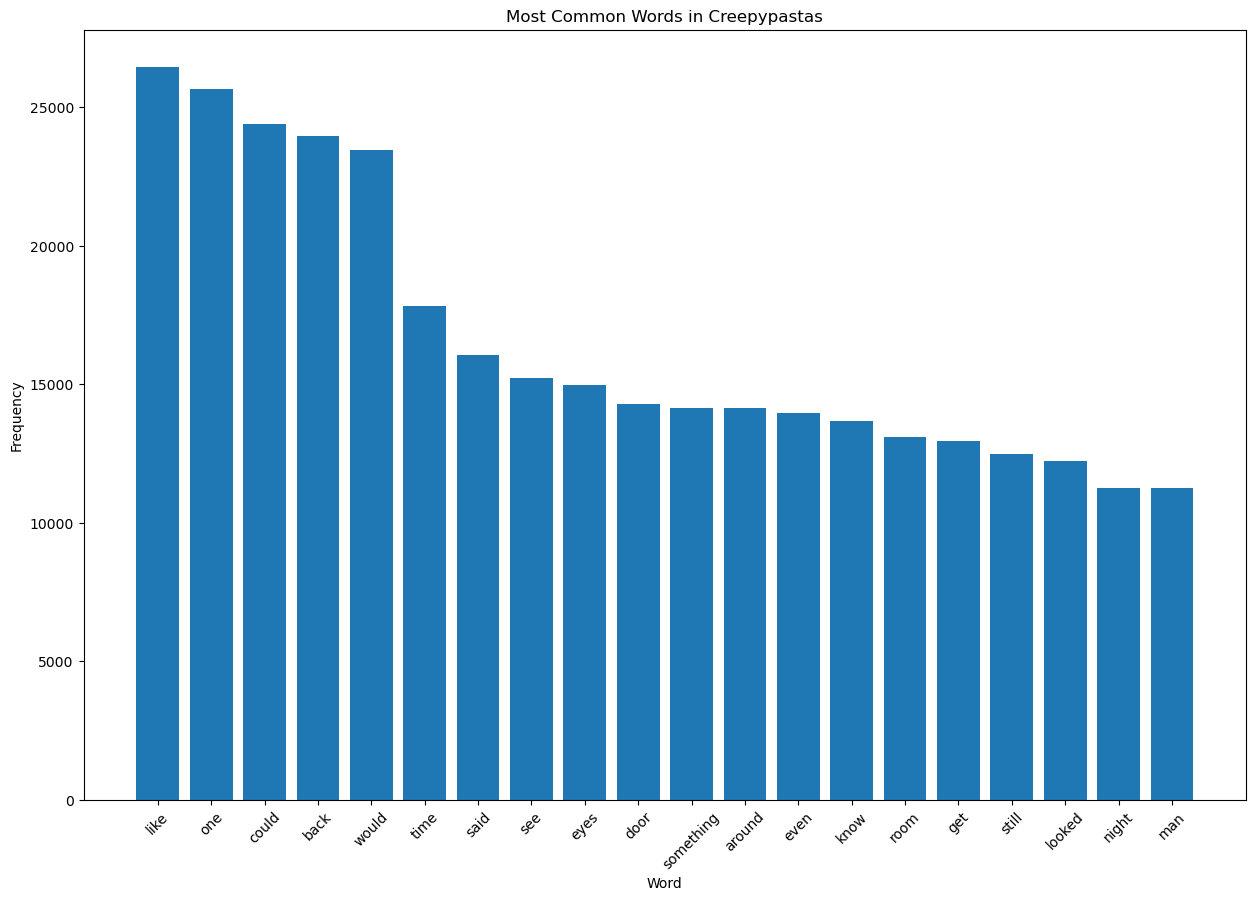

In [25]:
# fun to see, though with such a large corpus, the collocations are not very interesting
# let's look at the most common words
fdist = nltk.FreqDist(words)
most_common = fdist.most_common(20)

figure = plt.figure(figsize=(15, 10))
plot = plt.bar([x[0] for x in most_common], [x[1] for x in most_common])
ticks = plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in Creepypastas')

In [26]:
# once again, not very exciting, but interestingly, one of the most common words is 'eyes'
# eyes can indeed be very creepy.
# aditionally, 'night' is a common word, which makes sense, as many scary stories take place at night.

Total characters in all creepypasta titles: 63444


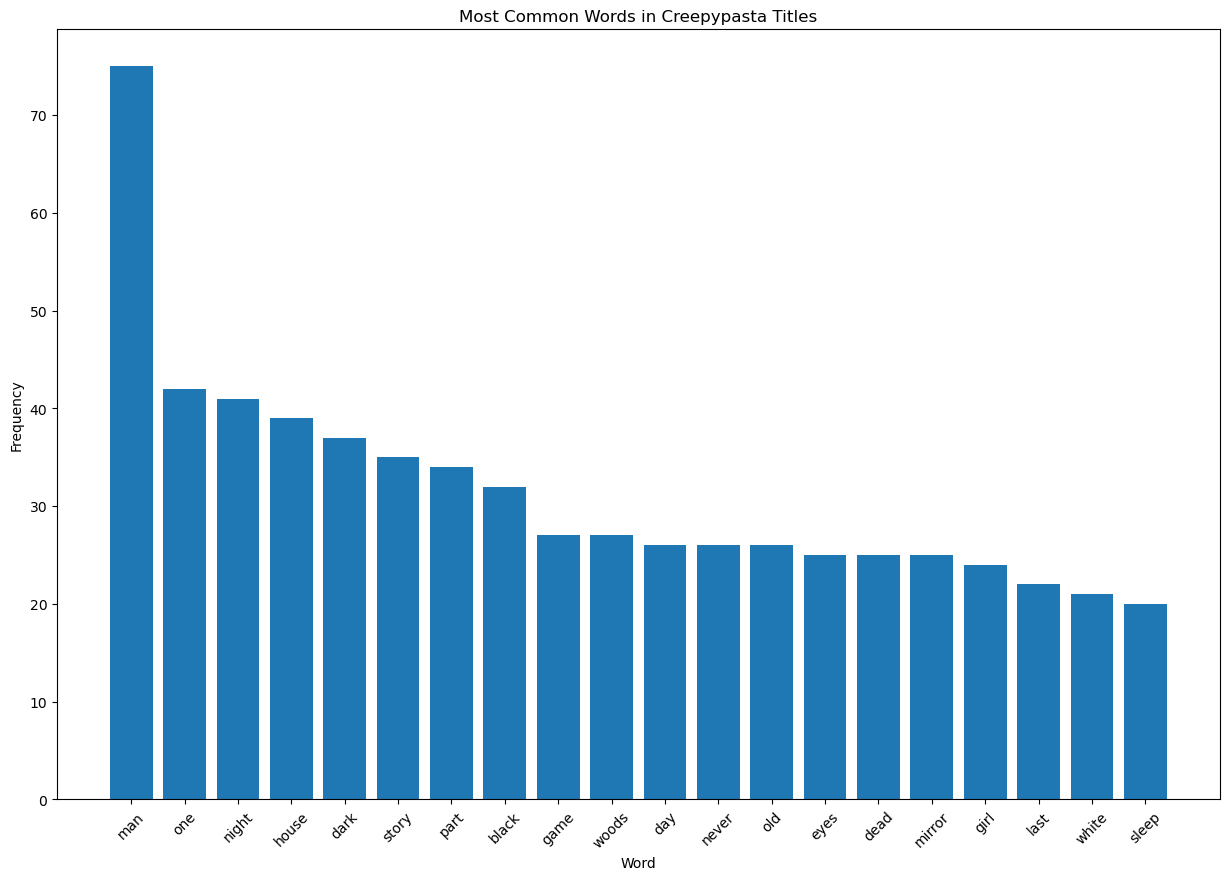

In [27]:
# let's look at the most common words in the titles now
all_titles = '\n'.join(df['story_name'])
print("Total characters in all creepypasta titles:", len(all_titles))
title_tokens = [t.lower() for t in nltk.word_tokenize(all_titles) if t.isalpha()]
title_words = [w for w in title_tokens if not w in stop_words]
title_fdist = nltk.FreqDist(title_words)
title_most_common = title_fdist.most_common(20)
plt.figure(figsize=(15, 10))
plt.bar([x[0] for x in title_most_common], [x[1] for x in title_most_common])
ticks = plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
title = plt.title('Most Common Words in Creepypasta Titles')

In [28]:
# ah, much more interesting! (Likely because titles typically have much less generic text)
# turns out men are really scary, along with dark houses at night!

In [196]:
# what about words that rarely occur?
# https://en.wikipedia.org/wiki/Hapax_legomenon
rare_words = fdist.hapaxes()
print("Total words that occur only once (hapax legomena):", len(rare_words))
# let's pick some at random
import random
random_words = random.sample(rare_words, 10)
string = "Random sample of hapax legomena: "
rand_words = ', '.join(random_words)
string += rand_words
print(string)

Total words that occur only once (hapax legomena): 16322
Random sample of hapax legomena: immesne, housedog, emoticon, haaaaaaarry, perfunctorily, unshaken, travers, delerious, advil, nudie


In [30]:
# just from a few samples, it seems like a lot of these words are typos or made up words. others are totally unexpected
# that makes total sense, but is kinda disappointing

Highest rated creepypasta: If You’re Armed and at the Glenmont Metro, Please Shoot Me
Total characters in 'If You’re Armed and at the Glenmont Metro, Please Shoot Me': 19494


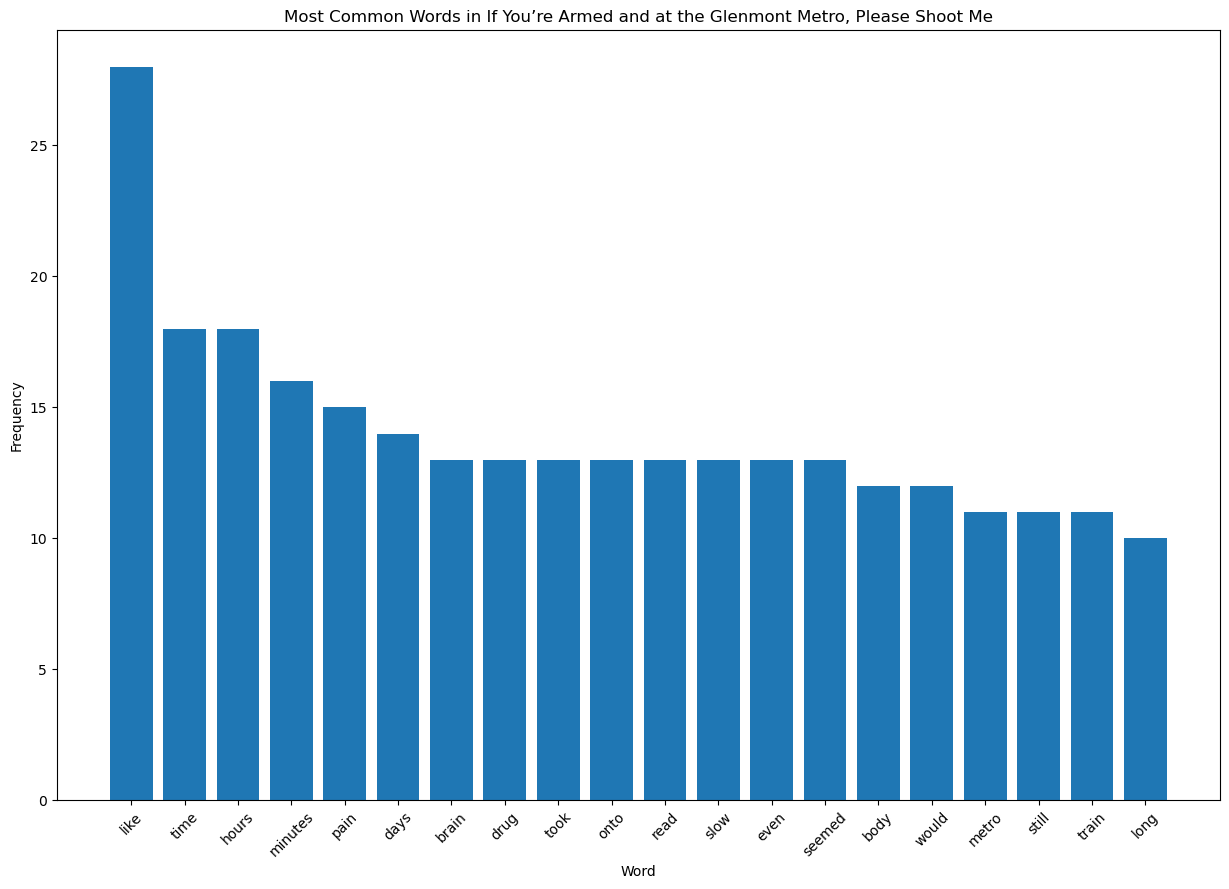

In [31]:
# now, let's take the highest rated story and perform textual analysis
highest_rated = df[df['average_rating'] == df['average_rating'].max()].iloc[0]
print("Highest rated creepypasta:", highest_rated['story_name'])
highest_rated_text = highest_rated['body']
print("Total characters in '"+highest_rated['story_name']+"':", len(highest_rated_text))
highest_rated_tokens = [t.lower() for t in nltk.word_tokenize(highest_rated_text) if t.isalpha()]
highest_rated_words = [w for w in highest_rated_tokens if not w in stop_words]
highest_rated_fdist = nltk.FreqDist(highest_rated_words)
highest_rated_most_common = highest_rated_fdist.most_common(20)
plt.figure(figsize=(15, 10))
plt.bar([x[0] for x in highest_rated_most_common], [x[1] for x in highest_rated_most_common])
ticks = plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Frequency')
title = plt.title('Most Common Words in '+highest_rated['story_name'])

In [32]:
# the most common words alone give a pretty good idea of what the story is about (it is freaky, be warned!)
# let's look at the collocations
highest_rated_ntext = nltk.Text(highest_rated_tokens)
highest_rated_ntext.collocations(window_size=4)

moby dick; waiting room; seemed like; like days; flight stairs;
effects drug; called back; escalator spilled; train arrive; glenmont
please; tuba solo; even though; twenty minutes; ankles advertisements;
glenmont shoot; hands knees; laws biomechanics; none drugs; please
shoot; psychology today


In [33]:
# let's try to find the shape of the story, inspired by Kurt Vonnegut
# https://www.youtube.com/watch?v=oP3c1h8v2ZQ

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()



story_text = highest_rated['body']
story_sentences = [s for s in nltk.sent_tokenize(story_text)]
print("Total sentences in '"+highest_rated['story_name']+"':", len(story_sentences))

Total sentences in 'If You’re Armed and at the Glenmont Metro, Please Shoot Me': 298


(-1.0, 1.0)

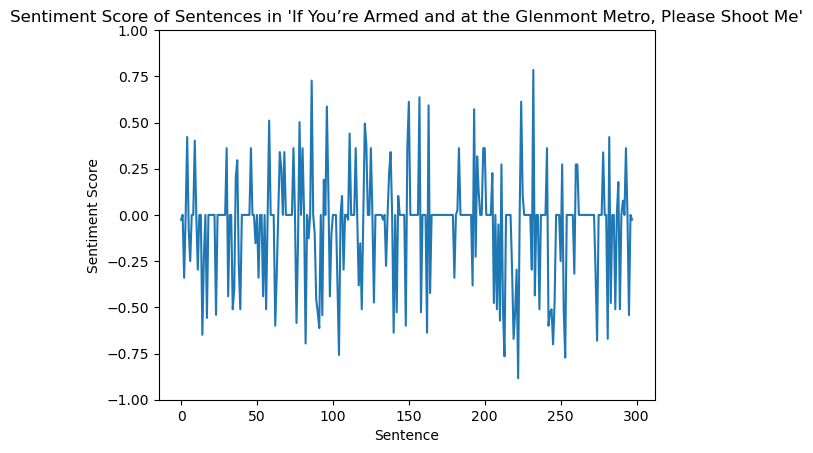

In [34]:
sentiment_scores = [sia.polarity_scores(s)['compound'] for s in story_sentences]
plot = plt.plot(sentiment_scores)
plt.xlabel('Sentence')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score of Sentences in \''+highest_rated['story_name']+"\'")
ax = plt.gca()

ax.set_ylim([-1, 1])

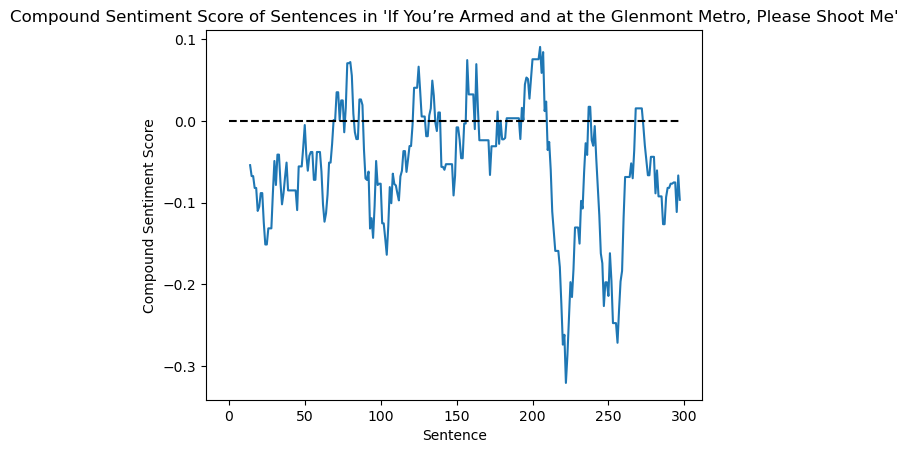

In [35]:
# now let's try to get a running average over a sentence window to get a better idea of the shape of the story
window_size = 15

sentiment_series = pd.Series(sentiment_scores)
sentiment_mean = sentiment_series.rolling(window_size).mean().values
x_axis = sentiment_series.index

plot = plt.plot(x_axis, sentiment_mean)
plt.plot(x_axis, [0 for i in range(len(x_axis))], 'k--')

plt.xlabel('Sentence') 
plt.ylabel('Compound Sentiment Score')
title = plt.title('Compound Sentiment Score of Sentences in \''+highest_rated['story_name']+"\'")

In [36]:
# now we can see much more of the story's shape
# The story is overall negative, with a few positive spikes
# let's view the lowest point and highest point of the story
# this is the point in which the average sentiment score within the window is the lowest/highest
import numpy as np
lowest_point = np.nanmin(sentiment_mean)
lowest_point_index = np.where(sentiment_mean == lowest_point)[0][0]
print("Lowest point of the story:", story_sentences[lowest_point_index])
print("Lowest point sentiment score:", lowest_point)
print()
highest_point = np.nanmax(sentiment_mean)
highest_point_index = np.where(sentiment_mean == highest_point)[0][0]
print("Highest point of the story:", story_sentences[highest_point_index])
print("Highest point sentiment score:", highest_point)

Lowest point of the story: The pain in my shoulder still screaming with the intensity of a fresh violent injury.
Lowest point sentiment score: -0.32060666666666665

Highest point of the story: I commanded my foot forwards for hours, then backwards for hours more when it seemed like I would miss the next step.
Highest point sentiment score: 0.09036666666666666


In [37]:
# during the low point, the narrator is describing pain from an injury. Makes sense!
# during the high point, the narrator is using language such as 'I commanded', which could potentially be seen as positive / powerful
# but overall, the high point is still only very slightly positive, landing it in neutral territory.
# looking at the sentence per sentence scores, it seems there is one very positive sentence that is bringing the average up.
# what is this sentence?
highest_sentence_index = np.argmax(sentiment_scores)
print("Highest sentiment sentence:", story_sentences[highest_sentence_index])
print("Highest sentiment score:", sentiment_scores[highest_sentence_index])


Highest sentiment sentence: Weeks of effort were finally rewarded with success – I stabilized on my hands and knees.
Highest sentiment score: 0.7845


In [38]:
# ah! the narrator is finally successful in his task (which in this case, is stabilization of his body) (long story)

In [39]:
df.head()

,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12,2020-02-20,"Drugs and Addictions, Madness, Paranoia, and ..."
1,A Shattered Life,9.13,"disease, entities, Matt Dymerski, monsters, p...","I don’t know when you’re going to read this,...",14,2020-07-22,"Madness, Paranoia, and Mental Illness, Monste..."
2,My Father Punished Me When I Talked to Ghosts,9.12,"abductions, blindness, child abuse, childhood...","I’ve been blind since birth. As I grew up, eve...",8,2019-12-10,"Abductions and Kidnappings, Children and Chil..."
3,Distorted Warning Signals,9.12,Ashley Rose Wellman\n,"When I got the first one, I was literally seco...",3,2019-07-13,"Beings and Entities, Deaths, Murders, and Dis..."
4,He Who Wanders,9.12,Simon Simonian\n,I missed the scorching wind of Andalusia. How ...,22,2017-01-24,Beings and Entities


In [197]:
# now let's do some machine learning!

# let's try to predict the average rating of a creepypasta based on the categories and estimated reading time.

# I think we need to encode the categories somehow
# we will use sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_squared_error



In [41]:
ml_df = df.copy()

In [42]:
ml_df['categories'] = ml_df['categories'].apply(lambda x: x.replace('\n', ''))
ml_df['categories'] = ml_df['categories'].apply(lambda x: x.replace('Please wait...', ''))
ml_df['categories'] = ml_df['categories'].apply(lambda x: x.split(', '))
ml_df['categories'] = ml_df['categories'].apply(lambda x: [y.strip() for y in x])


In [43]:
ml_df.head()

,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12,2020-02-20,"[Drugs and Addictions, Madness, Paranoia, and ..."
1,A Shattered Life,9.13,"disease, entities, Matt Dymerski, monsters, p...","I don’t know when you’re going to read this,...",14,2020-07-22,"[Madness, Paranoia, and Mental Illness, Monste..."
2,My Father Punished Me When I Talked to Ghosts,9.12,"abductions, blindness, child abuse, childhood...","I’ve been blind since birth. As I grew up, eve...",8,2019-12-10,"[Abductions and Kidnappings, Children and Chil..."
3,Distorted Warning Signals,9.12,Ashley Rose Wellman\n,"When I got the first one, I was literally seco...",3,2019-07-13,"[Beings and Entities, Deaths, Murders, and Dis..."
4,He Who Wanders,9.12,Simon Simonian\n,I missed the scorching wind of Andalusia. How ...,22,2017-01-24,[Beings and Entities]


In [44]:
# using multilabelbinarizer to encode categories since a story can have multiple categories
mlb = MultiLabelBinarizer()
categories_encoded = pd.DataFrame(mlb.fit_transform(ml_df['categories']), columns=mlb.classes_, index=ml_df.index)
ml_df_encoded = pd.concat([ml_df.drop(['categories', 'average_rating', 'tags', 'body', 'story_name', 'publish_date'], axis=1), categories_encoded], axis=1)
ml_df_encoded.head()

,estimated_reading_time,Abductions and Kidnappings,Animals and Wildlife,Apocalyptic and Dystopian,Artifacts and Objects,Based on True Events,Beings and Entities,Body Horror,Children and Childhood,Christmas and Holidays,...,Video Games and Gaming,Zombies and the Undead,and Cryptids,and Disappearances,and Mental Illness,and Parasites,and Parodies,and Witchcraft,and the Deep Web,the Internet
0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,0,0,1,0,0
4,22,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
ml_df.head()

,story_name,average_rating,tags,body,estimated_reading_time,publish_date,categories
0,"If You’re Armed and at the Glenmont Metro, Ple...",9.25,"drug trials, drugs, experimentation, experime...","If you’re armed and at the Glenmont metro, ple...",12,2020-02-20,"[Drugs and Addictions, Madness, Paranoia, and ..."
1,A Shattered Life,9.13,"disease, entities, Matt Dymerski, monsters, p...","I don’t know when you’re going to read this,...",14,2020-07-22,"[Madness, Paranoia, and Mental Illness, Monste..."
2,My Father Punished Me When I Talked to Ghosts,9.12,"abductions, blindness, child abuse, childhood...","I’ve been blind since birth. As I grew up, eve...",8,2019-12-10,"[Abductions and Kidnappings, Children and Chil..."
3,Distorted Warning Signals,9.12,Ashley Rose Wellman\n,"When I got the first one, I was literally seco...",3,2019-07-13,"[Beings and Entities, Deaths, Murders, and Dis..."
4,He Who Wanders,9.12,Simon Simonian\n,I missed the scorching wind of Andalusia. How ...,22,2017-01-24,[Beings and Entities]


In [46]:
# train test split!
X_train, X_test, y_train, y_test = train_test_split(ml_df_encoded, ml_df['average_rating'], test_size=0.2, random_state=42)


In [47]:
# Create a model (linear regression isn't great, let's try random forest)
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2779309120982842


In [66]:
predicted_ratings = pd.DataFrame(columns=['story_name', 'predicted_rating', 'categories', 'estimated_reading_time'])

In [49]:
# now that we have fit a model, let's get predictions for randomly generated creepypastas

# let's use openai to generate random titles, their categories, and their estimated reading times
# the title is just for fun, we will use the categories and estimated reading time for our model
import openai
from dotenv import load_dotenv
load_dotenv()
import os
openai.api_key = os.getenv("OPENAI_API_KEY")

In [50]:
system_prompt = "You generate creepypasta titles, categories, and estimated reading times. Valid categories are:"
for category in ml_df_encoded.columns[8:]:
    system_prompt += "\n" + category

print(system_prompt)


You generate creepypasta titles, categories, and estimated reading times. Valid categories are:
Children and Childhood
Christmas and Holidays
Classic Horror
Conspiracies and Government
Creatures
Creepypasta Stories
Dark Comedy
Dark Fantasy
Deaths
Demons and Possession
Discussion Posts
Dreams and Nightmares
Drugs and Addictions
Famous Creepypasta
Feelspastas and Happy Endings
Films and Footage
Folklore and Folktales
Ghosts and Spirits
Halloween Stories
Hell and the Afterlife
Historical Fiction
Humor
Illness and Injuries
Insects
Investigations and Crimes
Jobs and Occupations
Journals and Diaries
Locations and Sites
Madness
Magic
Medical and Hospitals
Military and Warfare
Monsters
Murders
Myths and Legends
Natural Disasters and Storms
Nature and the Outdoors
Occult
Paranoia
Poems and Poetry
Psychological Horror
Religion and Spirituality
Rites and Rituals
Science Fiction and Aliens
Science and Experimentation
Slashers and Gore
Sounds and Voices
Space and Cosmic Horror
Spiders
Strange and U

In [104]:

response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": system_prompt},
        {"role": "assistant", "content": "I can do that!"},
        {"role": "user", "content": "Generate a creepypasta title, category, and estimated reading time."},
        {"role": "assistant", "content": "Title: The Creepy Pasta\nCategories: Drugs and Addictions, Magic\nEstimated Reading Time: 5"},
        {"role": "user", "content": "Generate a unique creepypasta title, categories, and estimated reading time."}
    ],
    temperature=1.2
)

In [106]:
content = response['choices'][0]['message']['content']
content = content.split('\n')
print(content)

['Title: Shadows of the Forgotten Manor', 'Categories: Ghosts and Spirits, Suspense and Thrillers, Locations and Sites', 'Estimated Reading Time: 10 minutes']


In [107]:
title = content[0].split(':')[1].strip()
categories = content[1].split(':')[1].strip().split(', ')
reading_time = content[2].split(':')[1].strip()
if ' minutes' in reading_time:
    reading_time = reading_time.replace(' minutes', '')
    reading_time = int(reading_time)

print("Title:", title)
print("Categories:", categories)
print("Reading Time:", reading_time)

Title: Shadows of the Forgotten Manor
Categories: ['Ghosts and Spirits', 'Suspense and Thrillers', 'Locations and Sites']
Reading Time: 10


In [108]:
# get predicted rating

generated_df = pd.DataFrame(columns=ml_df_encoded.columns)
generated_df.loc[0] = 0
generated_df['estimated_reading_time'] = reading_time
for category in categories:
    if category in generated_df.columns:
        print("Found category:", category)
        generated_df[category] = 1
    else:
        print("Unkown category:", category)
    
generated_df.head()


Found category: Ghosts and Spirits
Found category: Suspense and Thrillers
Found category: Locations and Sites


,estimated_reading_time,Abductions and Kidnappings,Animals and Wildlife,Apocalyptic and Dystopian,Artifacts and Objects,Based on True Events,Beings and Entities,Body Horror,Children and Childhood,Christmas and Holidays,...,Video Games and Gaming,Zombies and the Undead,and Cryptids,and Disappearances,and Mental Illness,and Parasites,and Parodies,and Witchcraft,and the Deep Web,the Internet
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
predicted_rating = model.predict(generated_df)
print("Predicted rating for '"+title+"':", predicted_rating[0])

Predicted rating for 'Shadows of the Forgotten Manor': 7.56128116883117


In [110]:
predicted_ratings = pd.concat([predicted_ratings, pd.DataFrame([[title, predicted_rating[0], categories, reading_time]], columns=['story_name', 'predicted_rating', 'categories', 'estimated_reading_time'])], ignore_index=True)

In [111]:
# now we have a dataframe of predicted ratings (based on category and reading time) for randomly generated creepypastas!
predicted_ratings.head()

,story_name,predicted_rating,categories,estimated_reading_time
0,The Haunting of Hollow Hills,8.053145,"[Ghosts and Spirits, Occult]",10
1,The Haunting Shadows,7.745112,"[Ghosts and Spirits, Psychological Horror]",10
2,"""Whispers from the Abyss""",7.482686,"[Psychological Horror, Paranormal, Dark Fantasy]",10
3,"""The Shadow's Curse""",6.064097,"[Dark Fantasy, Demons and Possession]",8
4,Shadows of the Forgotten Manor,7.561281,"[Ghosts and Spirits, Suspense and Thrillers, L...",10


In [142]:
# according to the analysis above, people seem to dislike spiders and insects.
# additionally longer creepypastas have higher ratings
# with this knowledge, let's try to create a poorly rated creepypasta

bad_creepypasta = pd.DataFrame(columns=ml_df_encoded.columns)
bad_creepypasta.loc[0] = 0
bad_creepypasta['estimated_reading_time'] = 1
bad_creepypasta['Spiders'] = 1
bad_creepypasta['Insects'] = 1

predicted_rating = model.predict(bad_creepypasta)
print("Predicted rating for the bad creepypasta:", predicted_rating[0])

Predicted rating for the bad creepypasta: 6.432108429131574


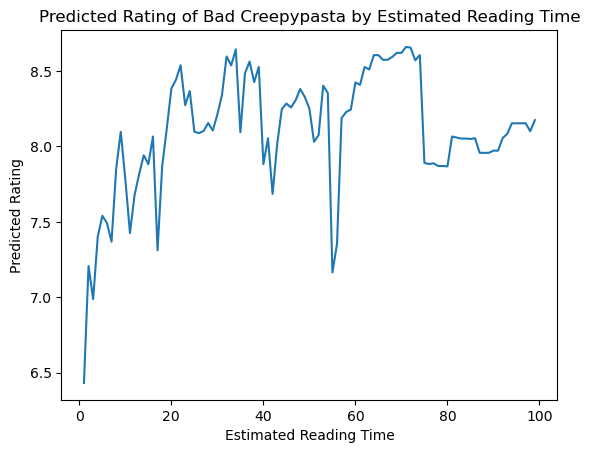

In [149]:
# let's see how well this creepypasta does with the same content but alternate reading times

bad_creepypasta_reading_times = pd.DataFrame(columns=ml_df_encoded.columns)
for i in range(0, 99):
    bad_creepypasta_reading_times.loc[i] = 0
bad_creepypasta_reading_times['Spiders'] = 1
bad_creepypasta_reading_times['Insects'] = 1
bad_creepypasta_reading_times['estimated_reading_time'] = [i for i in range(1, 100)]

plt.plot(bad_creepypasta_reading_times['estimated_reading_time'], model.predict(bad_creepypasta_reading_times))
plt.xlabel('Estimated Reading Time')
plt.ylabel('Predicted Rating')
title = plt.title('Predicted Rating of Bad Creepypasta by Estimated Reading Time')

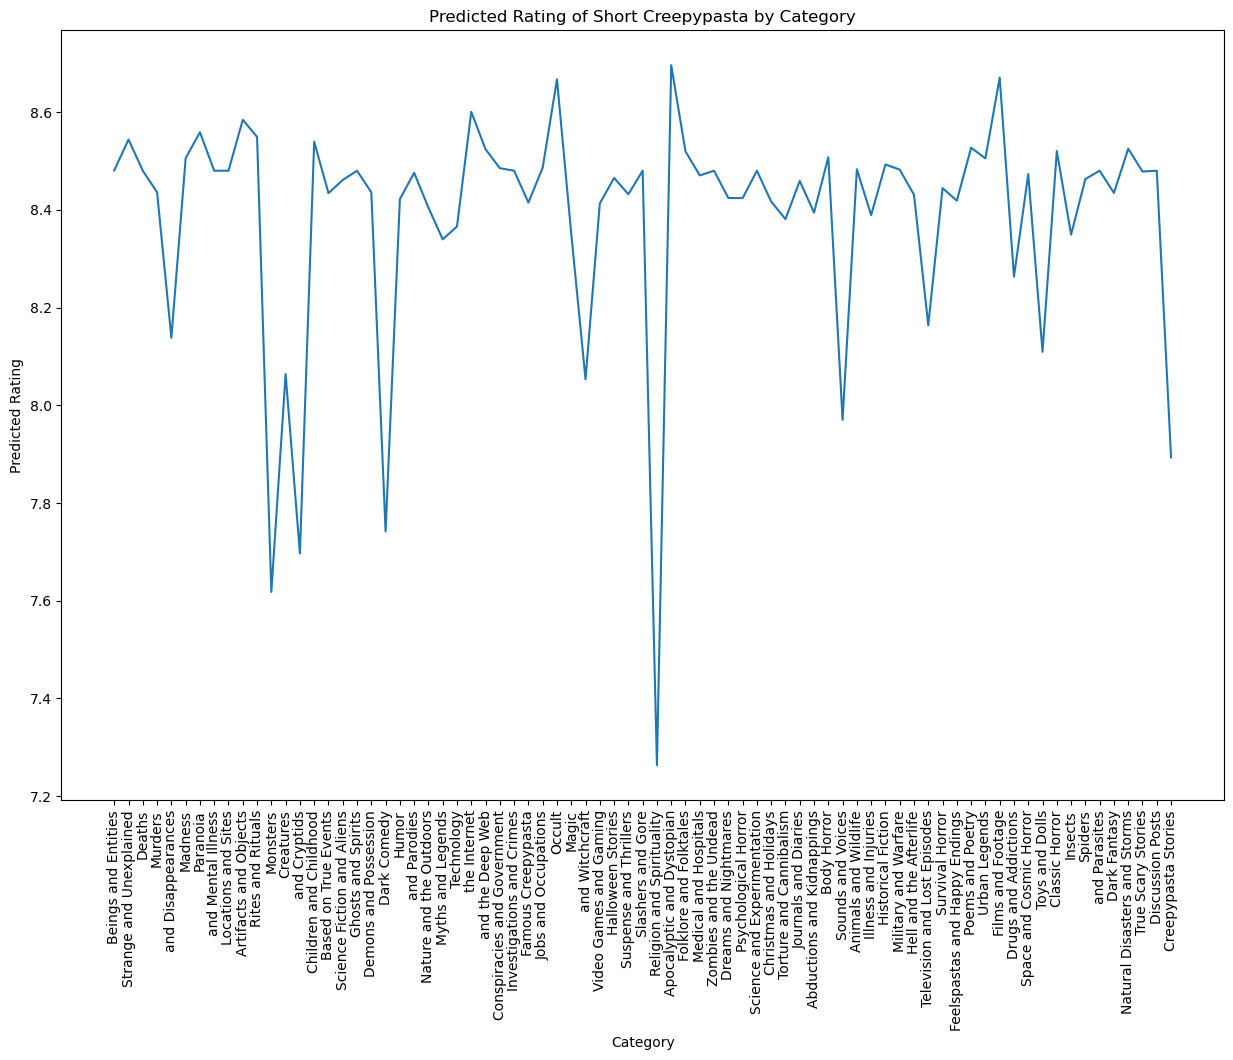

In [165]:
# now let's keep the same reading time but change the content

bad_creepypasta_content = pd.DataFrame(columns=ml_df_encoded.columns)
for i in range(0, len(categories)):
    bad_creepypasta_content.loc[i] = 0
bad_creepypasta_content['estimated_reading_time'] = 60
for i in range(0,len(categories)):
    bad_creepypasta_content.loc[i, categories[i]] = 1

figure = plt.figure(figsize=(15, 10))

plt.plot(category_dict.keys(), model.predict(bad_creepypasta_content))
ticks = plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Predicted Rating')
title = plt.title('Predicted Rating of Short Creepypasta by Category')

In [164]:
# and just for fun to test our model, let's try to create a long creepypasta with a happy ending
happy_ending_creepypasta = pd.DataFrame(columns=ml_df_encoded.columns)
happy_ending_creepypasta.loc[0] = 0
happy_ending_creepypasta['estimated_reading_time'] = 60
happy_ending_creepypasta['Feelspastas and Happy Endings'] = 1

predicted_rating = model.predict(happy_ending_creepypasta)
print("Predicted rating for the happy ending creepypasta:", predicted_rating[0])

Predicted rating for the happy ending creepypasta: 8.6669


In [ ]:
# fun project! Now we know how to create the best creepypastas, and can predict their ratings!